<a href="https://colab.research.google.com/github/kafahchaa/Chara/blob/main/XGBoost_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost scikit-learn seaborn matplotlib
!pip install scikit-learn==1.2.2
!pip install --upgrade xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 20.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("kerala.csv")

print("Data Awal:")
print(data.head(3))

Data Awal:
  SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY    JUN     JUL    AUG  \
0      KERALA  1901  28.7  44.7  51.6  160.0  174.7  824.6   743.0  357.5   
1      KERALA  1902   6.7   2.6  57.3   83.9  134.5  390.9  1205.0  315.8   
2      KERALA  1903   3.2  18.6   3.1   83.6  249.7  558.6  1022.5  420.2   

     SEP    OCT    NOV    DEC   ANNUAL RAINFALL FLOODS  
0  197.7  266.9  350.8   48.4            3248.6    YES  
1  491.6  358.4  158.3  121.5            3326.6    YES  
2  341.8  354.1  157.0   59.0            3271.2    YES  


In [ ]:
data.shape

(50000, 21)

FLOODS
YES    60
NO     58
Name: count, dtype: int64


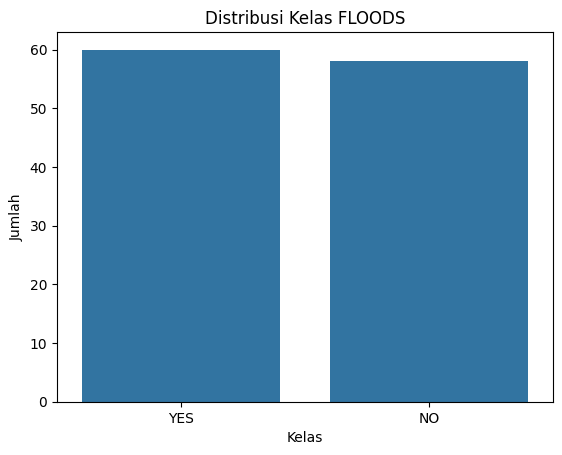

In [ ]:
data.columns = data.columns.str.strip()
class_counts = data['FLOODS'].value_counts()
print(class_counts)

# Visualisasi distribusi kelas
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Distribusi Kelas FLOODS')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


In [ ]:

# Menghapus kolom yang tidak diperlukan
data.drop(['SUBDIVISION', 'YEAR'], axis=1, inplace=True)

# Mengubah label menjadi numerik (YES = 1, NO = 0)
data['FLOODS'] = data['FLOODS'].map({'YES': 1, 'NO': 0})


In [ ]:
print(data.isnull().sum())

JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
ANNUAL RAINFALL    0
FLOODS             0
dtype: int64


In [ ]:
label_encoder = LabelEncoder()
data['FLOODS'] = label_encoder.fit_transform(data['FLOODS'])

In [ ]:
X = data.drop('FLOODS', axis=1)
y = data['FLOODS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Model XGBoost dengan Cross-Validation
# -------------------------
model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)

# Melakukan cross-validation
cv_scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores XGBoost: {cv_scores_xgb}')
print(f'Rata-rata Akurasi XGBoost: {np.mean(cv_scores_xgb):.2f}')

Cross-Validation Scores XGBoost: [1.         1.         1.         0.94736842 1.        ]
Rata-rata Akurasi XGBoost: 0.99


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:26:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [ ]:

# Membuat model XGBoost dengan n_estimators sebagai pengganti epoch
model_xgb = XGBClassifier(n_estimators=100, eval_metric='logloss')
model_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Evaluasi Model XGBoost
y_pred_xgb = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Akurasi XGBoost: {accuracy_xgb:.2f}')
print("Laporan Klasifikasi XGBoost:")
print(classification_report(y_test, y_pred_xgb))



Akurasi XGBoost: 1.00
Laporan Klasifikasi XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



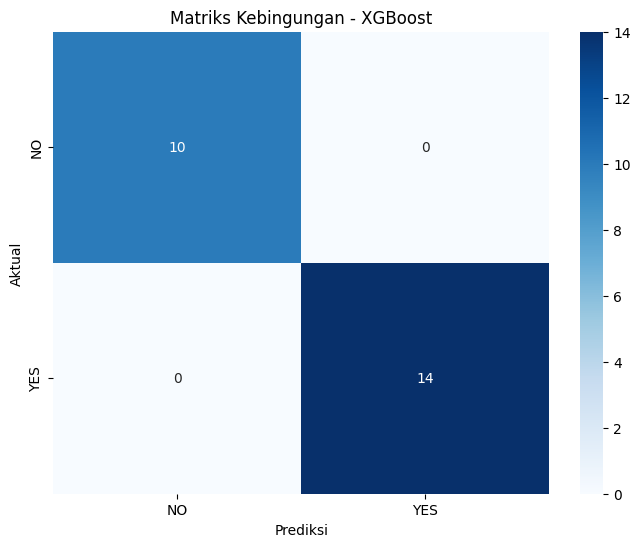

In [ ]:
# Matriks Kebingungan XGBoost
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title('Matriks Kebingungan - XGBoost')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Cross-Validation Scores Random Forest: [1.         1.         1.         0.94736842 1.        ]
Rata-rata Akurasi Random Forest: 0.99
Akurasi Random Forest: 1.00
Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



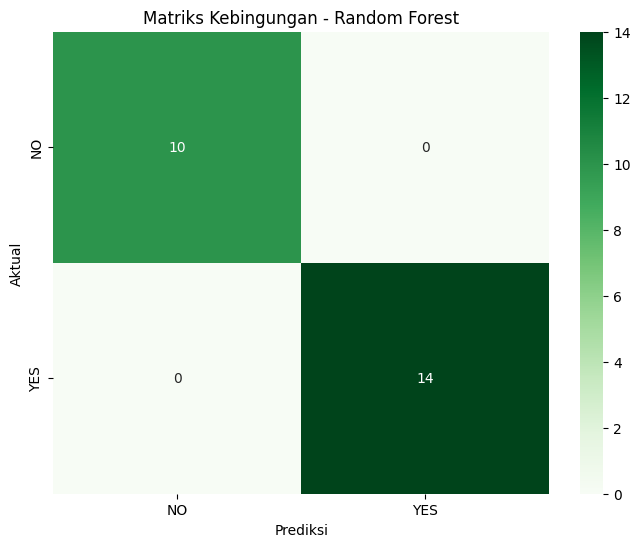

In [ ]:
# Model Random Forest dengan Cross-Validation
# -------------------------
model_rf = RandomForestClassifier(random_state=42)

# Melakukan cross-validation
cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f'Cross-Validation Scores Random Forest: {cv_scores_rf}')
print(f'Rata-rata Akurasi Random Forest: {np.mean(cv_scores_rf):.2f}')

# Melatih model pada seluruh data latih
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluasi Model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Akurasi Random Forest: {accuracy_rf:.2f}')
print("Laporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Matriks Kebingungan Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title('Matriks Kebingungan - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [ ]:
# Evaluasi Model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Akurasi Random Forest: {accuracy_rf:.2f}')
print("Laporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred_rf))

Akurasi Random Forest: 1.00
Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        14

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



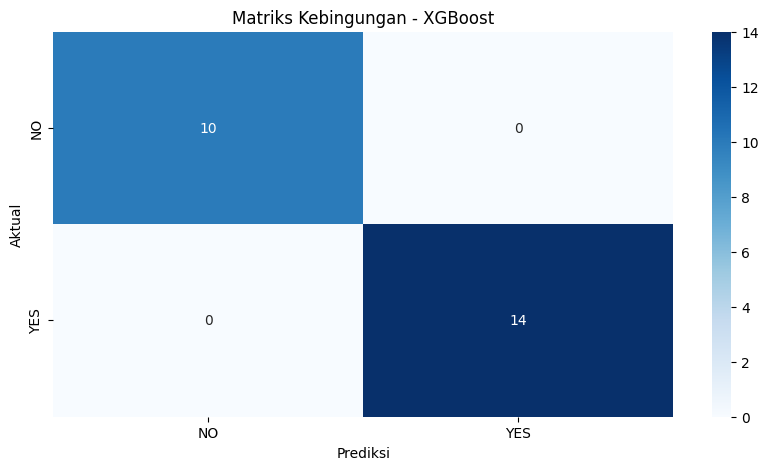

In [ ]:
# Visualisasi Matriks Kebingungan untuk XGBoost
plt.figure(figsize=(10, 5))
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title('Matriks Kebingungan - XGBoost')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

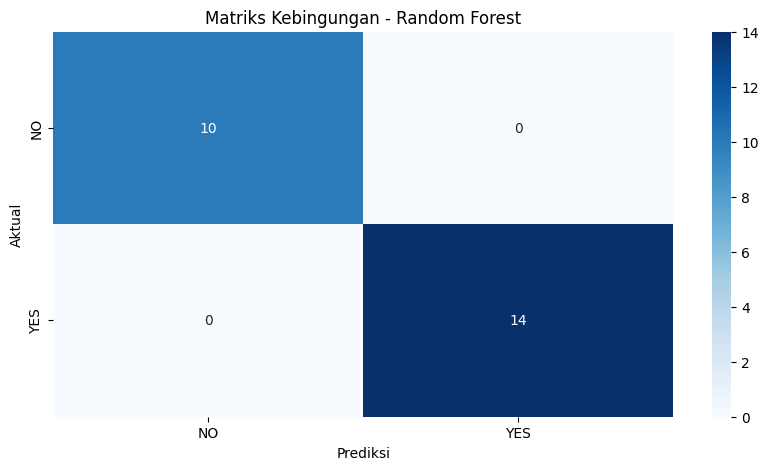

In [ ]:
# Visualisasi Matriks Kebingungan untuk Random Forest
plt.figure(figsize=(10, 5))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title('Matriks Kebingungan - Random Forest')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()